# Show FESOM mesh

### Getting the data

##### Please look at the information in the `get_data.ipynb` notebook. You have to end up with `swift.dkrz.de` folder located somwere in your system. All data used in this examples are located in this folder.  

This notebook shows how to visualize FESOM grid. We are going to use *%matplotlib notebook* option in Jupyter notebooks in order to make the plots interactive.

In [1]:
import sys
sys.path.append("../")

import pyfesom as pf
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
%matplotlib notebook
from matplotlib import cm

First we have to load the FESOM mesh. If your mesh is relativelly big, it's a good idea to save it as a pickle binary so in future it will be loaded faster. Set *usepickle* to *True* and if pickle file already exist

In [2]:
meshpath  ='../../swift.dkrz.de/COREII'
mesh = pf.load_mesh(meshpath, usepickle=True)
# mesh = pf.fesom_mesh(meshpath, get3d=False)

/scratch/users/nkolduno/swift.dkrz.de/COREII/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /scratch/users/nkolduno/swift.dkrz.de/COREII/pickle_mesh


You can have a look at the basic information about the mesh. Note that the information about 3d nods are not loaded.

In [3]:
mesh


FESOM mesh:
path                  = /scratch/users/nkolduno/swift.dkrz.de/COREII
alpha, beta, gamma    = 50, 15, -90
number of 2d nodes    = 126859
number of 2d elements = 244660
number of 3d nodes    = 3668773

        

Here we remove cyclic elements from the variables that contain information about elements and volumes (2d volumes, really areas).

In [4]:
elem2=mesh.elem[mesh.no_cyclic_elem,:]
voltri = mesh.voltri[mesh.no_cyclic_elem]

Setup a map and convert positions of the elements to the map projection

In [5]:
m = Basemap(projection='robin',lon_0=0, resolution='l')
x, y = m(mesh.x2, mesh.y2)

Plot triangular mesh:

    x     - lon (x) coordinates
    y     - lat (y) coordinates
    elem2 - 3d array, where each raw have trhee indexes of the x and y. So, each raw describes triangle 

<IPython.core.display.Javascript object>


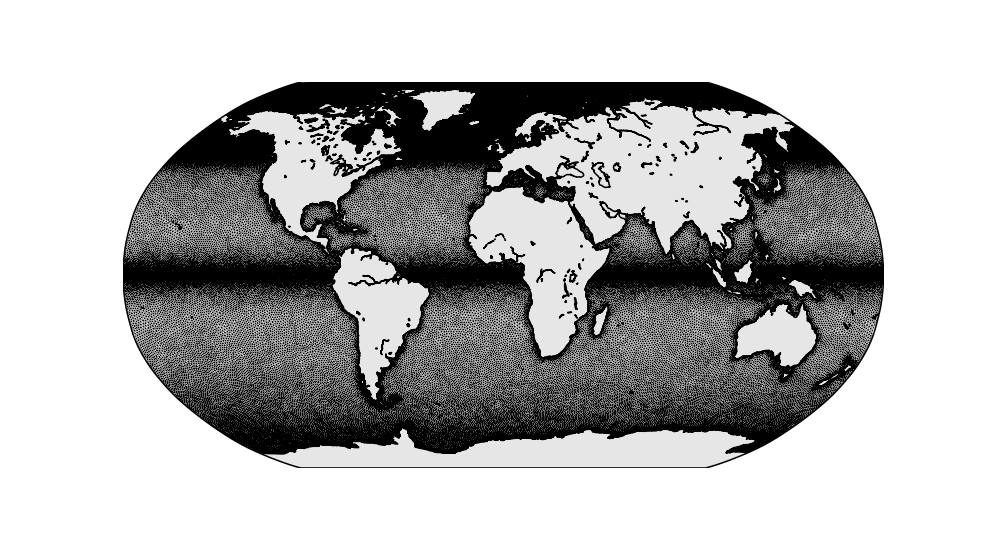

In [6]:
plt.figure(figsize=(9,5))
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
plt.triplot(x, y, elem2, lw=0.2,color='k');

The resulting plot is interactive. If you don't need interactivity replace *%matplotlib notebook* in the first notebook cell to *%matplotlib inline*. In interactive mode you can zoom to specific areas and do some other basic manupulations by pressing icons on the lower left. 

IMPORTANT - when the figure is in the interactive mode, it considered to be the active one, so the output of the following ploting functions will apear on this figure as well. To avoid this when you finish to work with the figure, you have to press the "switch off" button at the upper right of the figure.

One can plot color codded volume of the triangles as well. This is is much more computationally expensive. 

In [7]:
#this cell can be executed only once if you don't plan to change the Basemap settings 
m = Basemap(projection='robin',lon_0=0, resolution='l')
x, y = m(mesh.x2, mesh.y2)

<IPython.core.display.Javascript object>


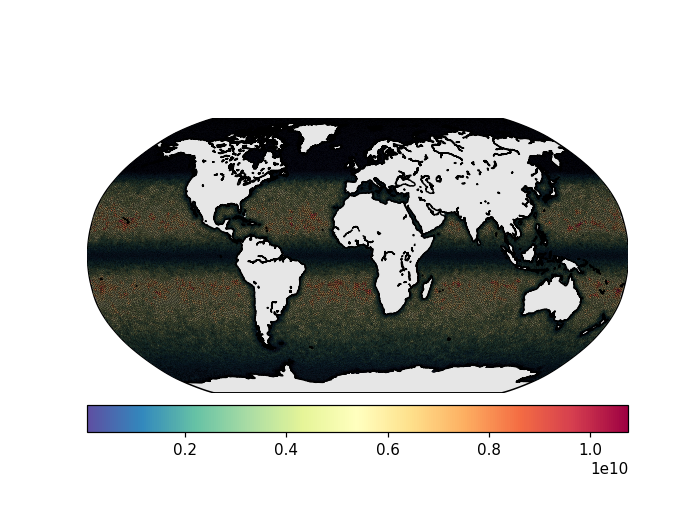

In [8]:
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
plt.tripcolor(x, y, elem2, \
              facecolors=mesh.voltri[mesh.no_cyclic_elem], \
              edgecolors='k',\
             cmap=cm.Spectral_r)
plt.colorbar(orientation='horizontal', pad=0.03);

The Basemap can use [many different projections](http://matplotlib.org/basemap/users/mapsetup.html) and one of course can define the region to be plotted. Please refer to the [Basemap documentation](http://matplotlib.org/basemap/index.html) for details.

##  North Pole stereographic projection

In [15]:
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)

<IPython.core.display.Javascript object>


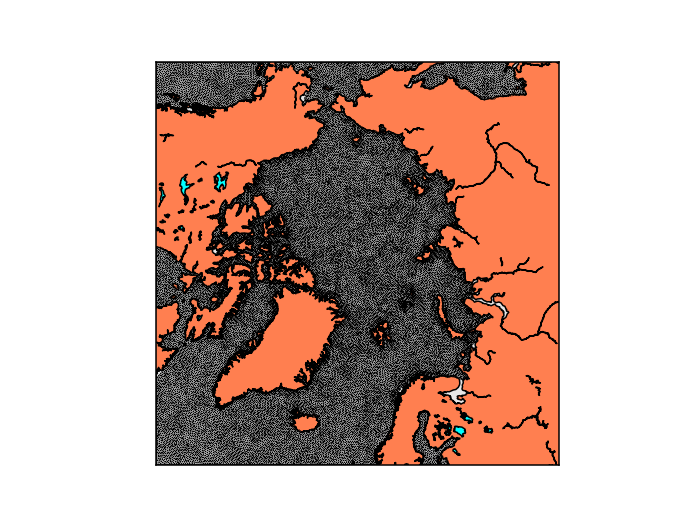

In [17]:
m.drawmapboundary(fill_color='0.9')
m.fillcontinents(color='coral',lake_color='aqua')
m.drawcoastlines()
#note that here we use *mesh.elem* directly since the projection can adequatelly process it.
im=plt.triplot(x, y, mesh.elem, lw=0.2,color='k')

## Mercator projection with etopo topography

In [58]:
m = Basemap(projection='merc',llcrnrlat=30,urcrnrlat=70,\
            llcrnrlon=-30,urcrnrlon=30,lat_ts=20,resolution='l')

x, y = m(mesh.x2, mesh.y2)

<IPython.core.display.Javascript object>


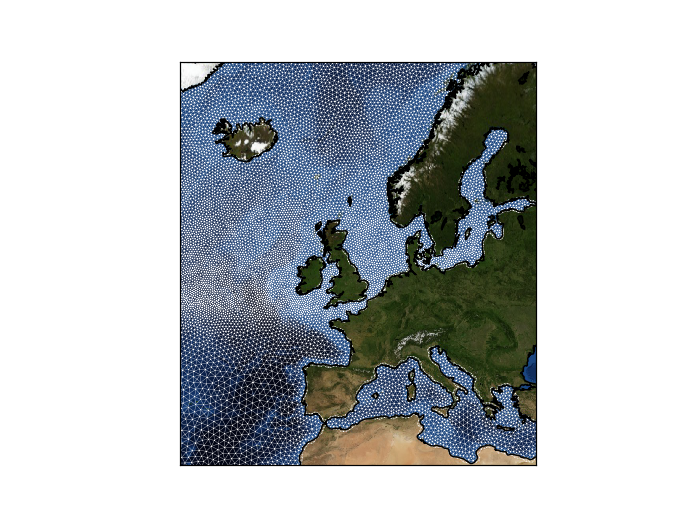

In [60]:
m.bluemarble()

plt.triplot(x, y, elem2, lw=0.2,color='w');

m.drawcoastlines()